### **Read Dataset**

* Import and read data crawled from Youtube videos in Bao Thanh Nien Channel

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/final_data.csv')

In [ ]:
df

,Unnamed: 0,title,views,published_date,likes,medical_field
0,0,Tượng 'Phật Trump' bán chạy nhờ ý tưởng thú vị...,"165,972 views","Premiered Apr 4, 2021",777.0,0
1,1,Xúc động cậu bé 6 tuổi tìm 'cánh tay người hùn...,"11,051 views","Apr 4, 2021",86.0,0
2,2,Kỳ lạ đàn cá trê cả ngàn con chen chúc ‘xin ăn...,"423,948 views","Premiered Apr 4, 2021",1.0,0
3,3,Bàng hoàng cả gia đình chết thương tâm vì cháy...,"173,464 views","Apr 4, 2021",560.0,0
4,4,H&M Việt Nam hoạt động ra sao giữa 'bão' tẩy c...,"292,501 views","Apr 4, 2021",2.0,0
...,...,...,...,...,...,...
14845,447,"Uống nhầm thuốc cai nghiện ma túy Methadone, b...","23,296 views","Nov 21, 2022",222.0,1
14846,448,🔴 [TRỰC TIẾP] - ĐỘNG KINH: NHỮNG CÂU HỎI LỚN C...,"5,696 views","Dec 20, 2022",29.0,1
14847,449,Nga – Ukraine | Những cái tên nào vừa ra đi tr...,"52,128 views","Jan 26, 2023",83.0,0
14848,450,Nga – Ukraine | Ngoại trưởng Lavrov nói phương...,"73,268 views","Jan 25, 2023",153.0,0


### **Data Preprocessing**

In [ ]:
#Kiểm tra các dòng bị lỗi khi cào dữ liệu
rows_to_drop = df[df['title'] == 'Title not found!']
rows_to_drop

,Unnamed: 0,title,views,published_date,likes,medical_field
8362,522,Title not found!,View not found!,Date not found!,NaN,0
8363,523,Title not found!,View not found!,Date not found!,NaN,0
8364,524,Title not found!,View not found!,Date not found!,NaN,0
8365,525,Title not found!,View not found!,Date not found!,NaN,0
8366,526,Title not found!,View not found!,Date not found!,NaN,0
8367,527,Title not found!,View not found!,Date not found!,NaN,0
8368,528,Title not found!,View not found!,Date not found!,NaN,0
8369,529,Title not found!,View not found!,Date not found!,NaN,0
8370,530,Title not found!,View not found!,Date not found!,NaN,0
8371,531,Title not found!,View not found!,Date not found!,NaN,0


In [ ]:
#Xoá các dòng 'title not found' vì lỗi trong lúc cào dữ liệu
df.drop(index=rows_to_drop.index, inplace=True)
df

,Unnamed: 0,title,views,published_date,likes,medical_field
0,0,Tượng 'Phật Trump' bán chạy nhờ ý tưởng thú vị...,"165,972 views","Premiered Apr 4, 2021",777.0,0
1,1,Xúc động cậu bé 6 tuổi tìm 'cánh tay người hùn...,"11,051 views","Apr 4, 2021",86.0,0
2,2,Kỳ lạ đàn cá trê cả ngàn con chen chúc ‘xin ăn...,"423,948 views","Premiered Apr 4, 2021",1.0,0
3,3,Bàng hoàng cả gia đình chết thương tâm vì cháy...,"173,464 views","Apr 4, 2021",560.0,0
4,4,H&M Việt Nam hoạt động ra sao giữa 'bão' tẩy c...,"292,501 views","Apr 4, 2021",2.0,0
...,...,...,...,...,...,...
14845,447,"Uống nhầm thuốc cai nghiện ma túy Methadone, b...","23,296 views","Nov 21, 2022",222.0,1
14846,448,🔴 [TRỰC TIẾP] - ĐỘNG KINH: NHỮNG CÂU HỎI LỚN C...,"5,696 views","Dec 20, 2022",29.0,1
14847,449,Nga – Ukraine | Những cái tên nào vừa ra đi tr...,"52,128 views","Jan 26, 2023",83.0,0
14848,450,Nga – Ukraine | Ngoại trưởng Lavrov nói phương...,"73,268 views","Jan 25, 2023",153.0,0


In [ ]:
#Kiểm tra và xử lý các missing values
df.isna().sum()

Unnamed: 0        0
title             0
views             2
published_date    2
likes             0
medical_field     0
dtype: int64

In [ ]:
df=df.dropna(subset=['views'])
df[df['views'].isna()]

,Unnamed: 0,title,views,published_date,likes,medical_field


In [ ]:
df.isna().sum()

Unnamed: 0        0
title             0
views             0
published_date    0
likes             0
medical_field     0
dtype: int64

In [ ]:
#Xóa các dữ liệu bị trùng
df=df.drop_duplicates(subset=['title'])
df

,Unnamed: 0,title,views,published_date,likes,medical_field
0,0,Tượng 'Phật Trump' bán chạy nhờ ý tưởng thú vị...,"165,972 views","Premiered Apr 4, 2021",777.0,0
1,1,Xúc động cậu bé 6 tuổi tìm 'cánh tay người hùn...,"11,051 views","Apr 4, 2021",86.0,0
2,2,Kỳ lạ đàn cá trê cả ngàn con chen chúc ‘xin ăn...,"423,948 views","Premiered Apr 4, 2021",1.0,0
3,3,Bàng hoàng cả gia đình chết thương tâm vì cháy...,"173,464 views","Apr 4, 2021",560.0,0
4,4,H&M Việt Nam hoạt động ra sao giữa 'bão' tẩy c...,"292,501 views","Apr 4, 2021",2.0,0
...,...,...,...,...,...,...
14845,447,"Uống nhầm thuốc cai nghiện ma túy Methadone, b...","23,296 views","Nov 21, 2022",222.0,1
14846,448,🔴 [TRỰC TIẾP] - ĐỘNG KINH: NHỮNG CÂU HỎI LỚN C...,"5,696 views","Dec 20, 2022",29.0,1
14847,449,Nga – Ukraine | Những cái tên nào vừa ra đi tr...,"52,128 views","Jan 26, 2023",83.0,0
14848,450,Nga – Ukraine | Ngoại trưởng Lavrov nói phương...,"73,268 views","Jan 25, 2023",153.0,0


In [ ]:
#Xử lý cột published_date về đúng format : yyyy-mm-dd
from datetime import datetime
from dateutil.relativedelta import relativedelta

#Xoá các từ dư thừa
df['published_date'] = df['published_date'].str.replace('Premiered ', '')
df['published_date'] = df['published_date'].str.replace('Streamed live on ', '')
df['published_date'] = df['published_date'].str.replace('Streamed ', '')
df['published_date'] = df['published_date'].str.replace('Premieres ', '')

#Hàm chuyển những published_date không có ngày cụ thể về dạng xác định
def get_previous_date(date_str, delta_type, delta_value):
    # Chuyển đổi chuỗi ngày thành đối tượng datetime
    date_format = "%b %d,%Y"
    date_obj = datetime.strptime(date_str, date_format)

    # Lấy ngày trước đó dựa trên loại delta
    if delta_type == 'second' or delta_type == 'seconds' or delta_type == 'minute' or delta_type == 'minutes'or delta_type == 'hour' or delta_type == 'hours':
        previous_date = date_obj
    elif delta_type == 'day' or delta_type == 'days':
        previous_date = date_obj - relativedelta(days=delta_value)
    elif delta_type == 'month' or delta_type == 'months':
        previous_date = date_obj - relativedelta(months=delta_value)
    elif delta_type == 'year' or delta_type == 'years':
        previous_date = date_obj - relativedelta(years=delta_value)
    else:
        return None

    # Chuyển đổi đối tượng datetime thành chuỗi ngày với cùng định dạng
    previous_date_str = previous_date.strftime(date_format)
    return previous_date_str


# Hàm parse dates
def parse_date(date_str):
    today='Jun 13,2024' #ngày crawl dữ liệu
    try:
        if isinstance(date_str, str):
            if 'ago' in date_str:
                split_date=date_str.split(" ")
                return datetime.strptime(get_previous_date(today, split_date[1], int(split_date[0])), "%b %d,%Y")
            else:
                return datetime.strptime(date_str.strip('"'), '%b %d, %Y')
    except ValueError:
        return None

df['published_date'] = df['published_date'].apply(parse_date)
df

,Unnamed: 0,title,views,published_date,likes,medical_field
0,0,Tượng 'Phật Trump' bán chạy nhờ ý tưởng thú vị...,"165,972 views",2021-04-04,777.0,0
1,1,Xúc động cậu bé 6 tuổi tìm 'cánh tay người hùn...,"11,051 views",2021-04-04,86.0,0
2,2,Kỳ lạ đàn cá trê cả ngàn con chen chúc ‘xin ăn...,"423,948 views",2021-04-04,1.0,0
3,3,Bàng hoàng cả gia đình chết thương tâm vì cháy...,"173,464 views",2021-04-04,560.0,0
4,4,H&M Việt Nam hoạt động ra sao giữa 'bão' tẩy c...,"292,501 views",2021-04-04,2.0,0
...,...,...,...,...,...,...
14845,447,"Uống nhầm thuốc cai nghiện ma túy Methadone, b...","23,296 views",2022-11-21,222.0,1
14846,448,🔴 [TRỰC TIẾP] - ĐỘNG KINH: NHỮNG CÂU HỎI LỚN C...,"5,696 views",2022-12-20,29.0,1
14847,449,Nga – Ukraine | Những cái tên nào vừa ra đi tr...,"52,128 views",2023-01-26,83.0,0
14848,450,Nga – Ukraine | Ngoại trưởng Lavrov nói phương...,"73,268 views",2023-01-25,153.0,0


In [ ]:
#Sắp xếp dữ liệu theo thời gian đăng tăng dần
df=df.sort_values(by='published_date',ascending=True)
df


,Unnamed: 0,title,views,published_date,likes,medical_field
10536,1019,Xét xử vụ buôn lậu xăng dầu ngàn tỉ lớn nhất V...,"31,009 views",2018-12-15,201.0,0
10524,1007,Cổ động viên hóa trang thành ông Park Hang seo...,"6,436 views",2018-12-15,45.0,0
10525,1008,Hơn 500 mô tô siêu khủng” diễu hành cổ động độ...,"28,767 views",2018-12-15,135.0,0
10526,1009,Sẵn sàng đảm bảo bão đêm an toàn khi Việt Nam ...,"28,049 views",2018-12-15,158.0,0
10527,1010,“Biệt đội xe công nông” mang kèn trống xuống đ...,"207,899 views",2018-12-15,416.0,0
...,...,...,...,...,...,...
3729,205,Xác thực khuôn mặt để chuyển tiền trên 10 triệ...,688 views,2024-06-13,10.0,0
9515,1675,Nơi in sao đề thi tốt nghiệp THPT tuyệt mật nh...,"3,342 views",2024-06-13,15.0,0
14794,396,Cựu Thứ trưởng Bộ Y tế Cao Minh Quang được đề ...,"3,874 views",NaT,36.0,0
14800,402,Yêu cầu Vietjet đền bù cho khách hàng sau sự c...,"24,014 views",NaT,164.0,0


In [ ]:
# Chuyển dữ liệu trong cột views về dạng số
def convert_views(views):
  if isinstance(views, str):
    if 'views' in views:
      views = views.replace(",", "").replace(" views", "")
      if "K" in views:
          return int(float(views.replace("K", "")) * 1000)
      elif "M" in views:
          return int(float(views.replace("M", "")) * 1000000)
      elif "B" in views:
          return int(float(views.replace("B", "")) * 1000000000)
      else:
          return int(views)
    else:
      return None
  else:
    return views


df["views"] = df["views"].apply(convert_views)
df["views"]

10536     31009.0
10524      6436.0
10525     28767.0
10526     28049.0
10527    207899.0
           ...   
3729        688.0
9515       3342.0
14794      3874.0
14800     24014.0
14808      3599.0
Name: views, Length: 14486, dtype: float64

In [ ]:
df.isna().sum() #Kiểm tra null sau khi chuyển kiểu dữ liệu

Unnamed: 0        0
title             0
views             1
published_date    3
likes             0
medical_field     0
dtype: int64

In [ ]:
df=df.dropna(subset=['views'])
df=df.dropna(subset=['published_date'])
df.isna().sum()

Unnamed: 0        0
title             0
views             0
published_date    0
likes             0
medical_field     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14482 entries, 10536 to 9515
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      14482 non-null  int64         
 1   title           14482 non-null  object        
 2   views           14482 non-null  float64       
 3   published_date  14482 non-null  datetime64[ns]
 4   likes           14482 non-null  float64       
 5   medical_field   14482 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 792.0+ KB


In [ ]:
#Chuyển dữ liệu của cột likes và views về dạng int
df["likes"]=df["likes"].astype(int)
df["views"]=df["views"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14482 entries, 10536 to 9515
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      14482 non-null  int64         
 1   title           14482 non-null  object        
 2   views           14482 non-null  int64         
 3   published_date  14482 non-null  datetime64[ns]
 4   likes           14482 non-null  int64         
 5   medical_field   14482 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 792.0+ KB


In [ ]:
#Xóa các cột không cần thiết
df = df.drop(columns=['Unnamed: 0','likes','title'])
df

,views,published_date,medical_field
10536,31009,2018-12-15,0
10524,6436,2018-12-15,0
10525,28767,2018-12-15,0
10526,28049,2018-12-15,0
10527,207899,2018-12-15,0
...,...,...,...
9513,6955,2024-06-10,0
9512,3764,2024-06-10,0
9514,8951,2024-06-13,1
3729,688,2024-06-13,0


In [ ]:
# Chọn thời điểm bắt đầu và kết thúc của giai đoạn Covid
start_date = datetime(2020, 1, 30)
end_date = datetime(2022, 3, 30)

# Gắn nhãn dữ liệu dựa trên thời điểm, 0 là ngoài thời điểm Covid, 1 là trong thời điểm Covid
df['time_in_covid'] = df['published_date'].apply(lambda x: 1 if x is not None and x >= start_date and x <= end_date else 0)

df

,views,published_date,medical_field,time_in_covid
10536,31009,2018-12-15,0,0
10524,6436,2018-12-15,0,0
10525,28767,2018-12-15,0,0
10526,28049,2018-12-15,0,0
10527,207899,2018-12-15,0,0
...,...,...,...,...
9513,6955,2024-06-10,0,0
9512,3764,2024-06-10,0,0
9514,8951,2024-06-13,1,0
3729,688,2024-06-13,0,0


In [ ]:
#Chia thành 2 giai đoạn để xử lý outlier trong từng giai đoạn
inCovid=df[df['time_in_covid']==1]
outCovid=df[df['time_in_covid']==0]

In [ ]:
# Hàm loại bỏ outlier
def replace_outliers(df, columns, threshold=1.5):
  df_ol=df.copy()
  for col in columns:
    Q1 = df_ol[col].quantile(0.25)
    Q3 = df_ol[col].quantile(0.75)

    # tính IQR:
    IQR= Q3 - Q1

    # khoảng chấp nhận được của giá trị
    lower= Q1 - threshold*IQR
    upper = Q3 + threshold*IQR

    # lọc và xóa outlier
    df_ol[col] = np.where(df_ol[col] < lower, lower, df_ol[col])
    df_ol[col] = np.where(df_ol[col] > upper, upper, df_ol[col])
  return df_ol

In [ ]:
#Xử lý outlier trong từng giai đoạn
inCovid=replace_outliers(inCovid,['views'])
outCovid=replace_outliers(outCovid,['views'])

In [ ]:
#Gộp 2 giai đoạn lại
df=pd.concat([inCovid,outCovid])
df["views"]=df["views"].astype(int)
df

,views,published_date,medical_field,time_in_covid
13010,73318,2020-01-30,0,1
13011,349165,2020-01-30,0,1
13014,349165,2020-01-30,1,1
13015,349165,2020-01-30,0,1
13013,349165,2020-01-30,1,1
...,...,...,...,...
9513,6955,2024-06-10,0,0
9512,3764,2024-06-10,0,0
9514,8951,2024-06-13,1,0
3729,688,2024-06-13,0,0


Kiểm định tỷ lệ video về y tế trong 2 giai đoạn

In [ ]:
# Tổng số video trong và ngoài giai đoạn covid
total_out = df[df['time_in_covid'] == 0].shape[0]
total_in = df[df['time_in_covid'] == 1].shape[0]

In [ ]:
# [Ngoài giai đoạn covid]

# Tổng số video liên quan đến lĩnh vực y tế
medical_out = df[(df['medical_field'] == 1) & (df['time_in_covid'] == 0)].shape[0]
# Tổng số video không liên quan đến lĩnh vực y tế
unmed_out = total_out-medical_out
# Tỷ lệ video liên quan đến lĩnh vực y tế
medical_per_out=medical_out/total_out
# Tỷ lệ video không liên quan đến lĩnh vực y tế
unmed_per_out=1-medical_per_out

In [ ]:
# [Giai đoạn covid]

# Tổng số video liên quan đến lĩnh vực y tế
medical_in = df[(df['medical_field'] == 1) & (df['time_in_covid'] == 1)].shape[0]
# Tổng số video không liên quan đến lĩnh vực y tế
unmed_in = total_in-medical_in
# Tỷ lệ video liên quan đến lĩnh vực y tế
medical_per_in=medical_in/total_in
# Tỷ lệ video không liên quan đến lĩnh vực y tế
unmed_per_in=1-medical_per_in


In [ ]:
# Tạo dataframe để so sánh
in_covid=[0,1]
med_vid=[medical_per_out, medical_per_in]
unmed_vid=[unmed_per_out, unmed_per_in]

summary_data=pd.DataFrame({
'in_Covid': in_covid,
'Related_medical_videos': med_vid,
'Unrelated_medical_videos': unmed_vid
})
summary_data.set_index('in_Covid', inplace=True)

summary_data

,Related_medical_videos,Unrelated_medical_videos
in_Covid,,
0,0.103416,0.896584
1,0.435799,0.564201


In [ ]:
did_prop = (medical_per_in-medical_per_out) - (unmed_per_in-unmed_per_out)
print('DiD:', did_prop)

DiD: 0.6647659463577787


Kiểm định lượt xem trung bình các video về y tế trong 2 giai đoạn

In [ ]:
# [Lượt xem trung bình]

#Các video về lĩnh vực y tế trong thời điểm Covid
medical_avgviews_in=df[(df['medical_field'] == 1) & (df['time_in_covid'] == 1)]['views'].mean()
#Các video về lĩnh vực khác trong thời điểm Covid
unmed_avgviews_in=df[(df['medical_field'] == 0) & (df['time_in_covid'] == 1)]['views'].mean()
#Các video về lĩnh vực y tế không trong thời điểm Covid
medical_avgviews_out=df[(df['medical_field'] == 1) & (df['time_in_covid'] == 0)]['views'].mean()
#Các video về lĩnh vực khác không trong thời điểm Covid
unmed_avgviews_out=df[(df['medical_field'] == 0) & (df['time_in_covid'] == 0)]['views'].mean()

In [ ]:
# Tạo dataframe để so sánh
med_vid=[medical_avgviews_out, medical_avgviews_in]
unmed_vid=[unmed_avgviews_out, unmed_avgviews_in]

summary_data=pd.DataFrame({
'in_Covid': in_covid,
'Average_views_medical_videos': med_vid,
'Average_views_other_videos': unmed_vid
})
summary_data.set_index('in_Covid', inplace=True)

summary_data

,Average_views_medical_videos,Average_views_other_videos
in_Covid,,
0,33623.112360,48509.927424
1,102787.156222,105228.370712


In [ ]:
D0=unmed_avgviews_in-unmed_avgviews_out
D0 #D0 là sự thay đổi về lượt xem trung bình của những video không thuộc lĩnh vực y tế

56718.443288635826

In [ ]:
D1=medical_avgviews_in-medical_avgviews_out
D1 #D1 là sự thay đổi về lượt xem trung bình của những video thuộc lĩnh vực y tế

69164.0438622709

In [ ]:
#DiD: sự chênh lệch trong sự thay đổi về lượt xem trung bình
observedDiff = D1 - D0
print('DiD:', observedDiff)

DiD: 12445.600573635078


In [ ]:
# thêm cột did biểu hiện sự tương tác kết hợp của 2 tác nhân (lĩnh vực y tế và giai đoạn covid)
df['did'] = df['time_in_covid']* df['medical_field']
df

,views,published_date,medical_field,time_in_covid,did
13010,73318,2020-01-30,0,1,0
13011,349165,2020-01-30,0,1,0
13014,349165,2020-01-30,1,1,1
13015,349165,2020-01-30,0,1,0
13013,349165,2020-01-30,1,1,1
...,...,...,...,...,...
9513,6955,2024-06-10,0,0,0
9512,3764,2024-06-10,0,0,0
9514,8951,2024-06-13,1,0,0
3729,688,2024-06-13,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df[['time_in_covid', 'medical_field', 'did']]
y = df['views']

model.fit(X, y)
model.coef_
# Hệ số ước lượng tác động của từng can thiệp (Covid_19, lĩnh vực y tế, cả 2) dựa trên sự thay đổi của views

array([ 56718.44328864, -14886.81506398,  12445.60057363])

In [ ]:
from statsmodels.formula.api import ols
ols = ols('views ~ medical_field+ time_in_covid + did', data=df).fit()

In [ ]:
p_value=ols.pvalues['did']
p_value

0.019391452400863925

### **Visualization**

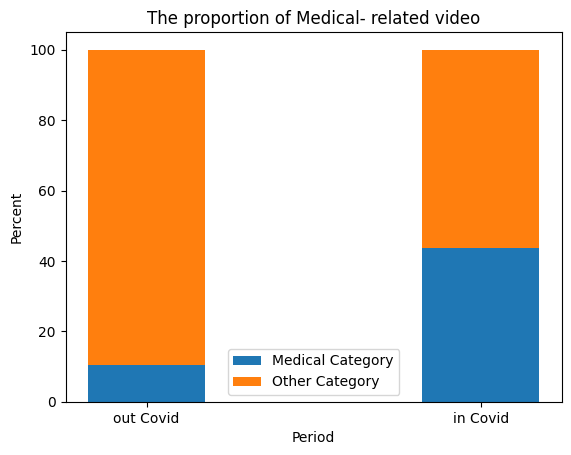

In [ ]:
#Trực quan hóa để thấy được sự thay đổi trong tỷ lệ các video liên quan đến y tế
labels = ['out Covid', 'in Covid']
category2 = [unmed_per_out*100,unmed_per_in*100]
category1 = [medical_per_out*100,medical_per_in*100]

x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots()

ax.bar(x, category1, width, label='Medical Category')
ax.bar(x, category2, width, bottom=category1, label='Other Category')

ax.set_xlabel('Period')
ax.set_ylabel('Percent')
ax.set_title('The proportion of Medical- related video')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Biểu đồ trên cho thấy tỷ lệ video thuộc lĩnh vực y tế tăng đáng kể trong giai đoạn Covid

=> Các video về lĩnh vực y tế được quan tâm nhiều hơn trong giai đoạn Covid.



In [ ]:
df['published_date']=df['published_date'].dt.to_period('M') #Gộp dữ liệu theo tháng để trực quan sự thay đổi lượt xem trung bình từng tháng

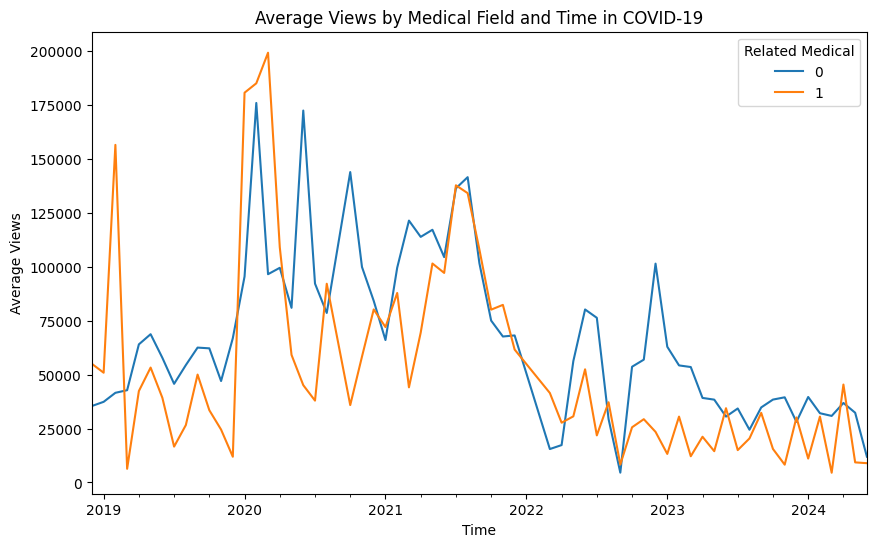

In [ ]:
plt.figure(figsize=(10,6))
avg_views=df.groupby(['published_date','medical_field'])['views'].mean().unstack()
avg_views.plot(kind='line', ax=plt.gca())
plt.title('Average Views by Medical Field and Time in COVID-19')
plt.xlabel('Time')
plt.ylabel('Average Views')
plt.legend(title='Related Medical')
plt.show()

Lượt xem trung bình của các video tin tức đều tăng trong giai đoạn Covid-19

Đặc biệt là ở đầu giai đoạn Covid lượt xem trung bình các video về lĩnh vực y tế tăng đột biến, chạm đỉnh, gần gấp 5 lần so với thời điểm trước và sau Covid, cao hơn tất cả các video về lĩnh vực khác (3 tháng đầu năm 2020).

# REPORT

**HYPOTHESIS**

* Các video về lĩnh vực y tế được quan tâm nhiều hơn trong thời điểm Covid bùng phát.

**METHODOLOGY**

* Cách thực hiện:

1.   Cào dữ liệu:
 - Với giả thuyết được đặt ra thì cần một lượng thông tin về tin tức có thể hiện rõ lượt tương tác và phải cùng trên một nguồn đăng trên một nền tảng nhất định. Vì thế, tụi em chọn cào dữ liệu từ kênh youtube của Báo Thanh Niên - kênh tin tức chính thống với tần suất đăng bài, lượt tương tác ổn định.
  - Tụi em cào dữ liệu từ các danh sách phát với nhiều video ở nhiều lĩnh vực và thời điểm khác nhau. Đồng thời, nhờ đó tụi em có thể kiểm soát được số lượng dữ liệu cào về.
  - Tụi em sẽ cào những thuộc tính của video như: Tiêu đề (để xác định lĩnh vực của video), lượt xem và lượt thích (thể hiện độ tương tác của người dùng với video), ngày đăng (xác định thời điểm của video)
  - Sau khi thực hiện các bước trên thì có được dataset ban đầu: video_data.csv

2.  Chia lĩnh vực cho các video
 - Dùng LLM để phân loại các video có liên quan lĩnh vực y tế dựa trên tiêu đề. Sau đó gắn nhãn dữ liệu bằng cách thêm cột medical_field (1: lĩnh vực y tế, 0: các lĩnh vực khác). Dataset thu được: final_data.csv - dataset mà tụi em sẽ sử dụng để kiểm định giả thuyết.
3. Tiền xử lý
 - Kiểm tra và xử lý missing values, dữ liệu bị lỗi và trùng trong quá trình cào
 - Chuyển các dữ liệu về đúng định dạng
 - Xác định thời điểm bị can thiệp và gắn nhãn (0: ngoài thời điểm, 1: trong thời điểm)
 - Xử lý outliers: + Vì lượt xem outlier sẽ ảnh hưởng lên lượt xem trung bình nên tụi em sẽ xử lý outliers đưa về min/max (xử lý theo từng giai đoạn) để kết quả được khách quan nhất.
4. Thực hiện kiểm định
   - Thống kê để quan sát sự thay đổi về số lượng các video về lĩnh vực y tế trên tổng thể
     
     + Tính tỉ lệ số lượng video về lĩnh vực y tế trong các giai đoạn khảo sát
     + Tính hệ số DiD để ước lượng tác động nhân quả của Covid-19 lên số lượng video về lĩnh vực y tế
  - Sử dụng Difference-In-Differences để kiểm định dựa trên lượt xem trung bình
     + Tính lượt xem trung bình của các video về lĩnh vực y tế trong các giai đoạn khảo sát
     + Tính hệ số DiD để ước lượng tác động nhân quả của Covid-19 lên lượt xem
      của các video về lĩnh vực y tế
     + Tính hệ số ước lượng của các tác nhân (lĩnh vực y tế, thời điểm Covid, yếu tố kết hợp - did) lên lượt xem
     + Sử dụng OLS để thống kê số liệu của các kết quả hồi quy từ dataset để có kết luận về giả thuyết đã đặt ra
5. Trực quan hóa dữ liệu
    + Trực quan để thấy rõ được sự thay đổi do tác động của Covid-19 lên số lượng video và lượt xem trung bình của các video về lĩnh vực y tế

**DISCUSSION**

Bộ dữ liệu:
- Kích thước khá lớn
- Dữ liệu không có nhiều missing values tuy nhiên định dạng của các thuộc tính không đồng nhất nên cần hiểu dữ liệu để chuyển đổi phù hợp
- Các thuộc tính chưa được tận dụng hết (không dùng thuộc tính 'likes')

Kết quả thống kê:
- Vì các video được lấy trong các danh sách phát được tạo ngẫu nhiên nên số lượng video trong từng thời điểm không đồng đều => Kết quả thống kê thu được chưa thực sự phản ánh đúng

**EXPLANATION**


1.  *Cào dữ liệu từ danh sách phát:*
- Vì youtube là web động và sử dụng thanh cuộn vô cực nên để cuộn và cào dữ liệu từ 3-4 năm trước thì sẽ phải yêu cầu bộ nhớ RAM rất lớn để lưu lại lượng thông tin khổng lồ trong hàng chục ngàn video, đồng thời số lượng video đó cũng quá lớn để xử lý
- Để crawl được ngày đăng cụ thể và lượt xem thì cần phải click 2 lần (click vào video và phần mô tả) và việc lặp lại nhiều lần như vậy thì bị Youtube chặn bằng cơ chế phát hiện bot
- Hơn nữa, nếu crawl dữ liệu từ đầu trang mà đường truyền bị gián đoạn thì phải tốn thời gian cuộn lại để tìm đến video bị gián đoạn. Trong khi đó, nếu cào bằng danh sách phát thì tụi em sẽ có được index cụ thể của video trong danh sách phát và dễ dàng tiếp tục cào.
2.   *Dùng LLM:*
- Do có quá nhiều dữ liệu nếu gắn nhãn bằng tay thì rất mất thời gian. Hơn nữa, lĩnh vực y tế cũng là lĩnh vực phổ biến nên dễ để phân loại.
3. *Không sử dụng thuộc tính "likes":*
- Mặc dù số lượt thích cũng phản ánh được mức độ tương tác, tuy nhiên trong bộ dữ liệu này số lượt thích là không đáng kể so với số lượt xem nên để bài toán kiểm định được chính xác hơn tụi em không sử dụng thuộc tính này.
4. *Xác định giai đoạn dịch Covid-19:*
- Bắt đầu: 30/1/2020 - Thời điểm phát hiện những ca nhiễm đầu tiên tại Việt Nam
- Kết thúc: 30/3/2022. Mặc dù, 7/7/2023 Bộ Y tế mới công bố hết dịch tại Việt Nam, nhưng tụi em chọn ngày kết thúc như trên vì đó là thời điểm mà xã hội đã được vận hành lại như trước khi có dịch và cũng như đã có vắc-xin kiểm soát.
5. *Chọn mô hình Diff-in-Diff:*
- Sythetic Control phù hợp với giả thuyết trên một nhóm video cụ thể và yêu cầu số lượng đơn vị không bị can thiệp (số video không trong giai đoạn Covid) đủ lớn
- Trong khi đó, Diff-in-Diff phù hợp với bộ dữ liệu có nhiều đơn vị quan sát và thời gian, cũng như đơn giản hơn.


**REFLECTION**

* Điểm mạnh:
  1. Crawl được thông tin từ web động và có thanh cuộn vô cực
  2. Crawl được thông tin từ nhiều lĩnh vực trải dài theo thời gian
  3. Đưa ra được kết luận với giả thuyết ban đầu
  4. Thực hiện đầy đủ các yêu cầu của project
* Điểm yếu:
  1. Do danh sách phát được tạo ngẫu nhiên nên có những khoảng thời gian số lượng video ít ảnh hưởng đến độ chính xác của bài toán kiểm định
  2. Chưa tận dụng được hết dữ liệu đã crawl
  3. Chưa tận dụng được tối đa chức năng của LLM

**LESSON LEARNED**

1. Biết được cách crawl dữ liệu và tầm quan trọng của việc lựa chọn web để crawl
2. Từ giả thuyết, xác định được những thông tin cần crawl
3. Hiểu được tập dữ liệu và giả thuyết để lựa chọn mô hình kiểm định phù hợp

**FINDINGS**

In [ ]:
print(ols.summary())
# Bảng các số liệu thống kê

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     341.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          1.86e-214
Time:                        09:06:38   Log-Likelihood:            -1.8709e+05
No. Observations:               14482   AIC:                         3.742e+05
Df Residuals:                   14478   BIC:                         3.742e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.851e+04   1589.692     30.515

Đây là kết quả của mô hình hồi quy OLS

* Intercept (hệ số chặn):
  
  + Hệ số : 4.851e+04
  
   Nghĩa là khi các biến độc lập khác đều bằng 0 thì lượt xem trung bình là 48510.

  + P-value: 0.000 - rất nhỏ => Hệ số chặn có ý nghĩa thống kê
* Medical_field:
  + Hệ số: -1.489e+04
   
   Cho thấy rằng, ngoài thời điểm Covid, các video về lĩnh vực y tế có số lượt xem trung bình ít hơn 14890 lượt so với các video không thuộc lĩnh vực y tế.
  + P-value: 0.003 - rất nhỏ < 0.05 => Cho thấy medical_field có tác động lên lượt xem.
* Time_in_covid:
  + Hệ số: 5.672e+04

  Cho thấy rằng, rằng trong thời điểm Covid,số lượt xem trung bình của tất cả các video tăng lên 56720 lượt.
  + P-value: 0.000 - rất nhỏ => Cho thấy Covid-19 có tác động đáng kể lên lượt xem
* did:
  + Hệ số: 1.245e+04
  Điều này chỉ ra rằng trong thời điểm Covid-19, số lượt xem trung bình của các video về lĩnh vực y tế tăng thêm 12450 lượt so với các video không thuộc lĩnh vực y tế.
  + P-value: 0.019 < 0.05
  Với độ tin cậy 95%, ta có thể chấp nhận giả thuyết "Các video về lĩnh vực y tế được quan tâm nhiều hơn trong thời điểm Covid bùng phát".



**CONCLUSION**


Kết quả cho thấy rằng trong thời điểm Covid-19, tất cả các video đều có số lượt xem tăng đáng kể, trong đó các video về lĩnh vực y tế được quan tâm nhiều hơn. Nghĩa là giả thuyết ban đầu đã được chấp nhận sau khi kiểm định với bộ dữ liệu trên.

**MEMBER INFORMATION**


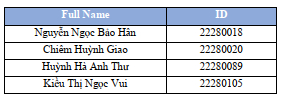